In [1]:
#import required libraries 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

dp = pd.read_csv('/Users/zoranaheimuli/Desktop/Telco_Cleaned.csv')


In [2]:
#show the features (=columns) and first data entries of the data frame
dp.head(5)

,Unnamed: 0,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
#get summary on the data frame incl. data types, shape and memeory stroage
dp.dtypes


Unnamed: 0             int64
CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [4]:
dp.columns

Index(['Unnamed: 0', 'CustomerID', 'Count', 'Country', 'State', 'City',
       'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [5]:
dp.drop('Unnamed: 0',axis=1, inplace=True)

In [6]:
dp.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [7]:
#looping thorugh the columns to get unique values per column 
for i in dp.columns:
    print(f"Unique {i}'s count: {dp[i].unique()}")
    print(f"{dp[i].unique()}n")

Unique CustomerID's count: ['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']n
Unique Count's count: [1]
[1]n
Unique Country's count: ['United States']
['United States']n
Unique State's count: ['California']
['California']n
Unique City's count: ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']n
Unique Zip Code's count: [90003 90005 90006 ... 96128 96134 96146]
[90003 90005 90006 ... 96128 96134 96146]n
Unique Lat Long's count: ['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']
['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401'

In [8]:
#change the data type of "TotalCharges" and "Tenure" to float
dp['Total Charges'] = pd.to_numeric(dp['Total Charges'], errors = 'coerce')

def feature_to_float(feature_list, dp):
    for i in feature_list:
        dp[i] = dp[i].astype(float)
    return dp
feature_to_float(['Tenure Months'],dp)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.50,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [9]:
dp.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [10]:
dp.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [11]:
plt.style.use("fivethirtyeight")

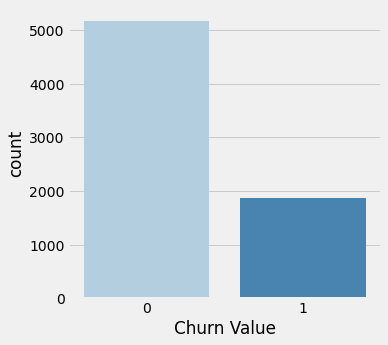

In [12]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=dp['Churn Value'], palette="Blues", linewidth=1)
plt.show()

In [13]:
# create function to generate boxplots 
plots = {1: [111], 2: [121,122], 3: [131,132,133], 4: [221,222,223,224], 5: [231,232,233,234,235], 6: [231,232,233,234,235,236]}

def boxplot(x, y, dp):
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns,7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.boxplot(x=x, y=j, data=dp[[x, j]], palette="Blues", linewidth=1)
        ax.set_title(j)
        
    return plt.show()           

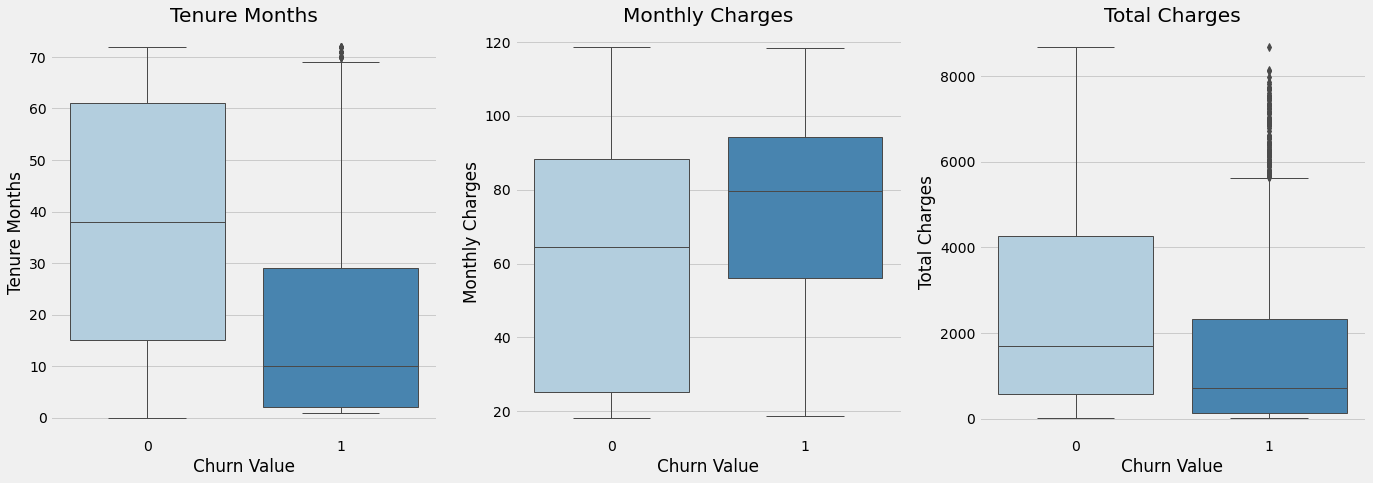

In [14]:
boxplot("Churn Value", ["Tenure Months", "Monthly Charges", "Total Charges"], dp)

In [15]:
def countplot(x, y, dp):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns,7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data=dp, palette='Blues', alpha=1,  linewidth=0.4, edgecolor='Black')
        ax.set_title(j)
        
    return plt.show()  
    
    

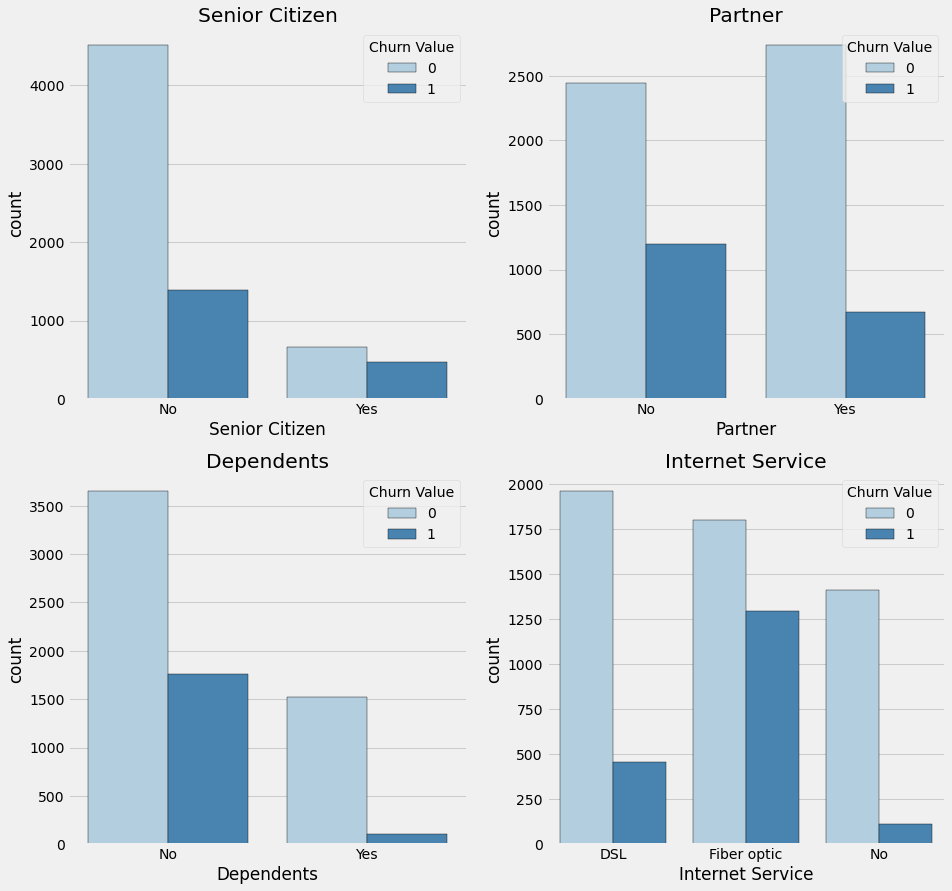

In [16]:
countplot("Churn Value", ['Senior Citizen', 'Partner', 'Dependents', 'Internet Service'], dp)

In [17]:
numerical_features = ["Tenure Months", "Monthly Charges", "Total Charges"]
dp_num = dp[numerical_features]
dp_num.describe()

Q1 = dp_num.quantile(0.25)
Q3 = dp_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((dp_num < (Q1 - 1.5 * IQR)) | (dp_num > (Q3 + 1.5 * IQR))).any()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [ ]:
dp = dp.dropna()

In [ ]:
dp = dp.drop(columns='CustomerID')

In [ ]:
dp['Number_AdditionalServices'] = (dp[['Online Security', 'Device Protection', 'Streaming Movies', 'Tech Support', 'Streaming TV', 'Online Backup']] == 'Yes').sum(axis=1)

In [ ]:
countplot('Churn Value', ['Number_AdditionalServices'], dp)

In [ ]:
#label encoding
features_le = ['Gender', 'Partner','Dependents', 'Churn Value', 'Phone Service', 'Paperless Billing' ]

def label_encoding(features, dp):
    for i in features:
        dp[i] = dp[i].map({'Yes': 1, 'No': 0})
    return

label_encoding(['Partner', 'Dependents', 'Churn Value', 'Phone Service', 'Paperless Billing'], dp)

dp['Gender'] = dp['Gender'].map({'Female': 1, 'Male': 0})


In [ ]:
#encoding or identifies columns
features_ohe = ['Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
               'Streaming TV', 'Streaming Movies', 'Contract', 'Payment Method', 'Number_AdditionalServices']

dp = pd.get_dummies(dp, columns=features_ohe)

In [ ]:
#min-max scaling
from sklear.processing import MinMaxScaler

features_mms = ['Tenure Months', 'Monthly Charges', 'Total Charges']
dp_features_mms = pd.DataFrame(dp, colunmns = features_mms)
dp_remaining_features = dp.drop(columns = features_mms)

mms = MinMaxScaler()
rescaled_features = mms.fit_transform(dp_features_mms)

dp_rescaled features = pd.DataFrame(rescaled_features, columns = features_mms, index = dp_remaining_features.index)

dp = pd.concat([dp_remaining_features, dp_rescaled_features], axis = 1)

In [ ]:
#display correlation plot for correlation of churn w/ each feature
plt.figure(figsize=(16,10))
dp.corr()['Churn Value'].sort_values(ascending=True).plot('kind'=='bar', figsize=(20,5))

In [ ]:
#re-check for the matplotlin.axes._subplots/graph


In [ ]:
#apply sklearn's splitter function train_test_split
from sklearn.model_selection import train_test_split

X1 = dp.drop('Churn Value', axis=1)
X = X1.values
y = dp['Churn Value'].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score,recall_score

In [ ]:
#define function that plots feature weighs for a classifier
def feature_weights(X_dp, classifier, classifier_name):
    weights = pd Series(classifier.coef_[0], index-X_dp.columns.values).sort_values(ascending=False)
    
        top_weights_selected = weights[:10]
        plt.figure(figsize=(7,6))
        plt.tick_params(labelsize=10)
        plt.title(f'{classifier_name} - Top 10 Features')
        top_weights_selected.plt("kind"=="bar")
        
        bottom_weights_selected = weights[-10:]
        plt.figure(figsize=(7,6))
        plt.tick_params(labelsize=10)
        plt.title(f'{classifier_name} - Bottom 10 Features')
        bottom_weights_selected.plot("kind"=="bar")
        
        return print("")